
# Project: Medical Appointments No-Show Rate

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This report is all about the analysing information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment while considering other factors.

### Questions
> The list of questuons to be answered over the course of this report:
> 1. What is the ratio of people attending/missing appointment?
> 2. Which gender visit the doctor more often, the males or females?
> 3. What is the most common disease among people that are scheduled for appointment?
> 4. What age is most affected by each of this disease?
> 5. Who is most affected by hypertension? Male or Female?

In [87]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime

<a id='wrangling'></a>
## Data Wrangling


### General Properties

Let us begin by loading the CSV file into a Dataframe.

In [88]:
# load the csv file into dataframe
appt = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

Then, we take a look at the first 5 observations of the dataframe

In [129]:
# Return first 5 rows
appt.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1


The cell below shows the size (dimension) of the dataframe i.e rows x columns:

In [130]:
# dimension of the dataframe
appt.shape

(110527, 12)

Let us print information about the DataFrame. This information contains the number of columns, column labels, column data types, memory usage, and the number of cells in each column (non-null values).

In [91]:
# print information of dataframe
appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are 14 variables in the dataset listed below. Also are the features of each of the columns.

In [92]:
#list out all columns of dataframe
appt.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Below are brief features of the variable:

• PatientId: Id of each patient.

• AppointmentID: Id of each appointment.

• Gender: Gender of the Patient (Male or Female)

• ScheduledDay: The day the patient set up their appointment.

• AppointmentDay: The day of the appointment.

• Age: How old is the patient.

• Neighbourhood: The location of the appointment.

• Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. (True or False)

• Hipertension: whether or not the patient has hypertension. (True or False)

• Diabetes: whether or not the patient has diabetes. (True or False)

• Alcoholism: whether or not the patient is alcoholic. (True or False)

• Handcap: whether or not the patient is handicap. (True or False)

• SMS_received: whether or not the patient received the instructions for the appointment. (True or False)

• No-show: whether or not the patient showed up. (True or False)

> It is worth mentioning that the **'Hipertension'** and **'Handcap'** columns are spelt wrongly so will need fixing.
>
>Also, the hyphen symbol (**'-'**) should be replaced with the underscore (**'_'**) to be uniform with the **'SMS_received'** column. But more on that later.

Let us see what the statistical summary data (*percentile*, *mean* and *std* of the numerical values) look like. It actually shows us a quick glance of how our dataset looks like.

In [93]:
# summarize the central tendency, dispersion and shape of a dataset's distribution
appt.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the information above, we can easily see that:

• Patient's age is between **-1** (bad value) and **115** with an average value of **37**.

• **9.8%** of the patients have scholarship while 90.2% does not.

• About **19.7%** of patients are with hypertension.

• Also, about **7.18%** have diabetes. 

• **3%** of the total patients are alcoholic.

• **2.2%** patients are handicap.

• We can also see that **32%** received the sms containing the information of their appointments.

• The Handcap variable has a value of **'4'** which is somewaht not right since our supposed value should be **"0"** and/or **"1"**

Let us also look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

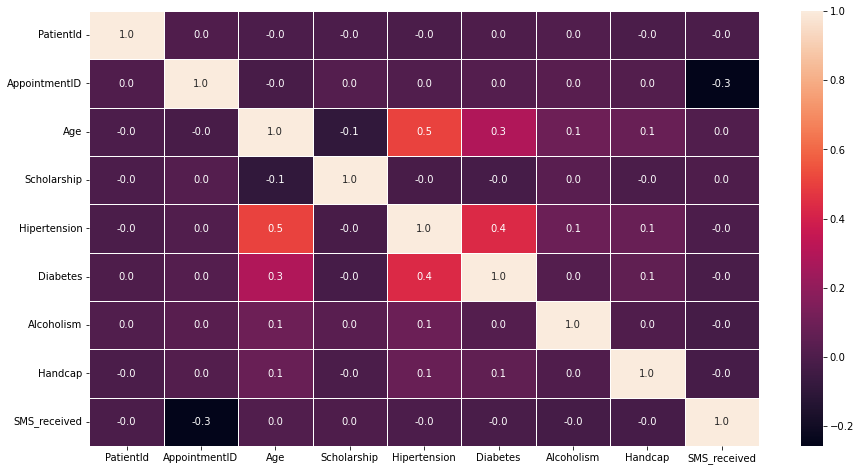

In [94]:
# correlation map
f,ax = plt.subplots(figsize = (15,8))
sns.heatmap(appt.corr(), annot = True, linewidths=.5, fmt = '.1f', ax = ax)
plt.show()

### NULL VALUES, ZERO VALUES & DUPLICATES 

First, we take a look at variables with null values and check if they are necessary for the analysis. If they are, we can fix them or otherwise, we drop them.

In [95]:
# check for missing data
appt.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

We do not have a variable with null values!

So, next we take a look at variables with zero values.

In [96]:
# check for variavles with zero value
appt.apply(lambda x: sum(x==0),axis=0)

PatientId              0
AppointmentID          0
Gender                 0
ScheduledDay           0
AppointmentDay         0
Age                 3539
Neighbourhood          0
Scholarship        99666
Hipertension       88726
Diabetes          102584
Alcoholism        107167
Handcap           108286
SMS_received       75045
No-show                0
dtype: int64

> Note: Variables like **'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'** and **'SMS_received'** having zero values are okay in the sense that their values are **'1'** and **'0'** which interpretes to **'True'** and **'False'** respectively.
>
> However, the **'Age'** variable having zero value is not really right because a patient can not be zero year old.

Let us check for duplicated values too:

In [97]:
# check for duplicated value
appt.duplicated().sum()

0

Surprisingly, the dataset has **zero duplicates** and **zero null values**. 

Now that we are through with checking out the general properties of the dataset, let us proceed to cleaning the necessary parts of our dataset.


### Data Cleaning (Replace this with more specific notes!)

> **A. DROP COLUMNS WHICH ARE NOT VITAL**

Apparently, the only column we will drop from the dataset are the **'PatientId'** and the **'AppointmentID'**. They are not needed for our analysis and no actionable insight can be extracted using them.

In [98]:
#drop columns not needed for analysis
appt.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [99]:
# confirm changes
appt.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [100]:
# confirm dropped columns again
appt.info() , appt.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


(None, (110527, 12))

The cells we ran above confirms that both columns have been dropped successfully.

> **B. CORRECT MISPELT COLUMNS NAMES**

In [101]:
# rename columns not properly spelt
appt.rename(columns={'Hipertension':'hypertension', 'Handcap' : 'handicap'}, inplace=True)

In [102]:
#confirm changes
appt.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,handicap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


> **C. CHANGE COLUMNS NAMES TO LOWER CASE FOR UNIFORMITY**

In [103]:
# change all column name strings to lowercase
appt.columns = appt.columns.str.lower()

In [104]:
#confirm changes
appt.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


> **D. REPLACE HYPHEN WITH UNDERSCORE FOR CONCERENED COLUMN FOR UNIFORMITY**

In [105]:
# replace hyphen symbol with the underscore
appt.columns = appt.columns.str.replace('-', '_')

In [106]:
#confirm changes
appt.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


Let us use the lambda function to assign **'0'** and **'1'** values of the **'no_show'** column to **True** and **False** respectively.

In [107]:
# using lambda function to evaluate an expression
appt['no_show'] = appt['no_show'].apply(lambda x: 1 if x=='No' else 0 )

<a id='eda'></a>
## Exploratory Data Analysis

### #1: What is the ratio of people attending/missing appointment?

Assign all **'True'** and **'False'** values to a variable each.

In [108]:
# Attended appointment
showed = appt.no_show == True
# Missed appointment
missed = appt.no_show == False

We will find the mean of each variable

In [109]:
# find mean of showed
showed = showed.mean()
showed

0.798067440534892

In [110]:
# find mean of missed
missed = missed.mean()
missed

0.20193255946510807

We will use a plot to see the ratio between the two set of patients.

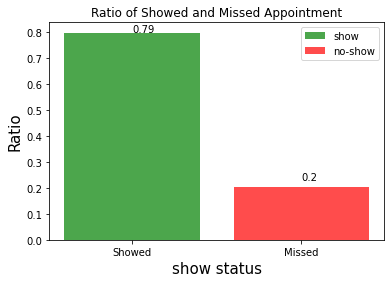

In [111]:
#plot bar graph to compare Showed and Missed appointments
showed_bar = plt.bar(0, showed, width=.8, alpha=0.7, color ='green', label='show' )
missed_bar = plt.bar(1, missed, width=.8, alpha=0.7, color='red', label='no-show')

plt.xlabel('show status', fontsize=15)
plt.ylabel('Ratio', fontsize=15)
plt.xticks([0, 1], ['Showed', 'Missed'])
plt.title('Ratio of Showed and Missed Appointment');
plt.text(1.0,0.23,'0.2')
plt.text(0.002,0.80,'0.79')
plt.legend();

80% of people showed up for their appointment while the remaining 20% missed the appointment.

### #2: Which gender visit the doctor more often, the males or females?

In [112]:
#Number of Male and Female Gender
appt['gender'].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

We can get the percentage of each gender that by dividing their counts by the total number of patients.

In [113]:
# get percentage of each gender
appt['gender'].value_counts()/appt.shape[0]

F    0.649977
M    0.350023
Name: gender, dtype: float64

We can further assign each gender to a variable to easily show the percentage on a plot.

In [114]:
#Assign variable to Female proportion
Female_Prop = appt['gender'].value_counts()[0]/appt.shape[0]
Female_Prop

0.6499769287142508

In [115]:
#Assign variable to Male proportion
Male_Prop = appt['gender'].value_counts()[1]/appt.shape[0]
Male_Prop

0.35002307128574917

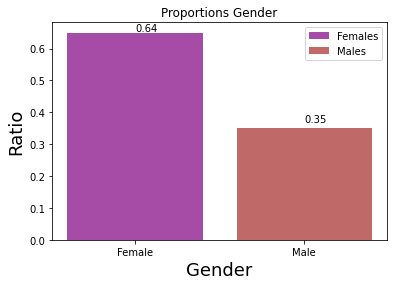

In [116]:
#plot bar graph to show Gender proportion
Female_bar = plt.bar(0, Female_Prop, width=.8, alpha=0.7, color ='purple', label='Females' )
Male_bar = plt.bar(1, Male_Prop, width=.8, alpha=0.7, color='brown', label='Males')

# title and labels
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Ratio', fontsize=18)
plt.title('Proportions Gender');
plt.text(1.0,0.37,'0.35')
plt.text(0.002,0.655,'0.64')
plt.legend();

We can see that the proportion of people that schedule appointment are mostly Female - 65% and Male 35%

### #3: What is the most common disease among people that are scheduled for appointment ?

In [117]:
#Get mean for Hypertension column
appt.hypertension.mean()

0.1972459218109602

The mean of the hypertension column is less that 1. Thus, we should mulltiply by 100 to get a percentage.

In [118]:
#Assign to a variable and multiply by 100
hyper_prop = appt.hypertension.mean()*100
hyper_prop

19.72459218109602

In [119]:
#Get mean for diabetes column
diabetes_prop = appt.diabetes.mean()*100
diabetes_prop

7.186479321794674

In [120]:
#Get mean for alcoholism column
alcoholism_prop = appt.alcoholism.mean()*100
alcoholism_prop

3.039981181068879

In [121]:
#Get mean for handicap column
handicap_prop = appt.handicap.mean()*100
handicap_prop

2.2247957512643968

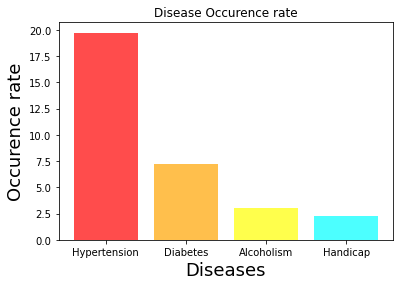

In [122]:
locations = [1, 2, 3, 4]
heights = [hyper_prop, diabetes_prop, alcoholism_prop, handicap_prop]
colors = ['red', 'orange', 'yellow', 'cyan']
labels = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']

plt.bar(locations,heights,color=colors, alpha=0.7);
plt.title('Disease Occurence rate')
plt.xlabel('Diseases', fontsize=18)
plt.ylabel('Occurence rate', fontsize=18)
plt.xticks(locations, labels);

Among the people scheduled appointment, hypertension is the most common disease with the ratio **20%**. Followed by Diabetes which has **7%** and Alcoholism **3.03%** and Handicap **2.2%**

### #4: What age is most affected by each of this disease?

We will do this by plotting the ages against each disease to see what age has the highest rate of disease

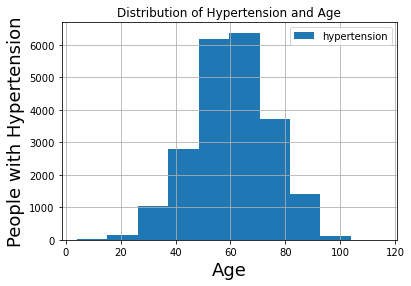

In [123]:
# create a plot for hypertension and age distribution

appt.age[appt.hypertension == 1].hist(bins = 10, label = 'hypertension' );
plt.title('Distribution of Hypertension and Age')
plt.xlabel('Age', fontsize=18);
plt.ylabel('People with Hypertension', fontsize=18);
plt.legend();

High rate of hypertension is common at the age of 50 to 70 years

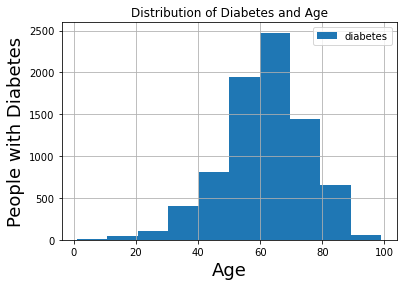

In [124]:
# create a plot for diabetes and age distribution

appt.age[appt.diabetes == 1].hist(bins = 10, label = 'diabetes' );
plt.title('Distribution of Diabetes and Age')
plt.xlabel('Age', fontsize=18);
plt.ylabel('People with Diabetes', fontsize=18);
plt.legend();

High rate of Diabetes is common at the age of 50 to 70 years

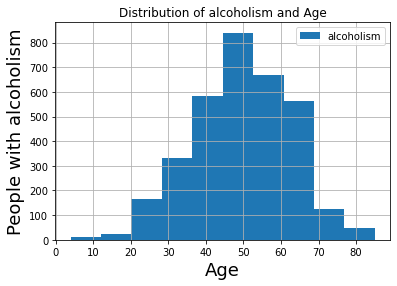

In [125]:
# create a plot for alcoholism and age distribution

appt.age[appt.alcoholism == 1].hist(bins = 10, label = 'alcoholism' );
plt.title('Distribution of alcoholism and Age')
plt.xlabel('Age', fontsize=18);
plt.ylabel('People with alcoholism', fontsize=18);
plt.legend();

High rate of Alcolism is highest at the age of 45 to 60 years

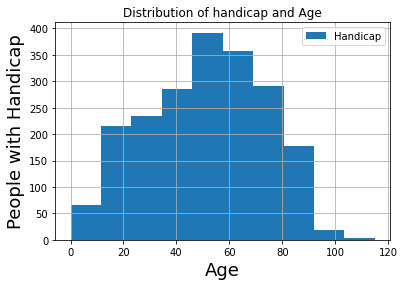

In [126]:
# create a plot for handicap and age distribution

appt.age[appt.handicap == 1].hist(bins = 10, label = 'Handicap' );
plt.title('Distribution of handicap and Age')
plt.xlabel('Age', fontsize=18);
plt.ylabel('People with Handicap', fontsize=18);
plt.legend();

### #5: Who is most affected by hypertension? Male or Female?

In [127]:
# Group Gender by Hypertension variable
hyper = appt.groupby('gender')['hypertension'].mean()
hyper

gender
F    0.213516
M    0.167033
Name: hypertension, dtype: float64

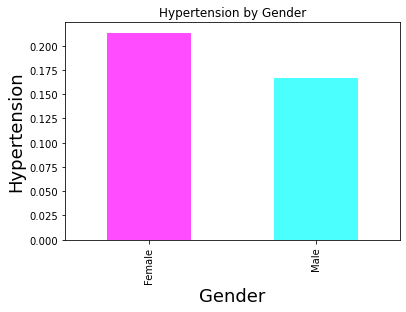

In [128]:
# plot  bar chart for hypertension and gender

hyper.plot(kind='bar', alpha=.7, color=['magenta', 'cyan']);

# title and labels
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Hypertension by Gender');
plt.xlabel('Gender', fontsize=18);
plt.ylabel('Hypertension', fontsize=18);

More Females are prone to hypertension. 21% of Females and 16% of Males have hypertension.

<a id='conclusions'></a>
## Conclusions

Results:

> 1. Females go to the doctor more often than males - 65% of females but 35 % of males.
>
> 2. Among the people scheduled appointment, hypertension is the most common disease - almost 20% are affected by hypertension. 
>
> 3. Hypertension are higher among Females than males.
>
> 4. 80% of the people usually show up to scheduled appointment.

Limitations: There are a couple limitations with the dataset.

> 1. No information regarding the appointment time.
>
> 2. 99.9% of the schedule date appointments in the dataset are in the year 2016. Just a few rows are 2015.
>
> 3. The dataset does not contain sufficient data for the whole year - only three months are available for the appointment dates.